# COUNTER ANALYSIS

First we ASSEMBLE it, after that its been LABELED. Then its PACKAGED and these going into a CARTON. At last the Cartons get PALLETIZED   
It goes from Assembly (Harro Hoefliger) to Labeler (Krones) to Packaging (Schubert Verpacker) to Cartoner (Pester Umverpacker) to Palletizer (Pester)


|IP_TAG Name   |Machine|German|Desired Speed|Alarm File location|
|--------------|-------|------|-------------|-------------------| 
|36630901_SPEED|Assembly|Montage|32 used but 35|Y:\E00_Solostar\E6_Assembly_Line_6\E63_Montage\CSV|   
|36640901_SPEED|Labeler|Etikettierer|500|Y:\E00_Solostar\E6_Assembly_Line_6\E64_Etikettierer\AuditTrail|   
|36650901_SPEED|Packaging (Pacemaker!)|Kartonierer|450 (3pcs) or 500 (5pcs)|Y:\E00_Solostar\E6_Assembly_Line_6\E65_Kartonierer\40 - Reports|   
|36680901_SPEED|Cartoner|Endverpacker (UVP)||Y:\E00_Solostar\E6_Assembly_Line_6\E68_Endverpacker\UVP|   
|36680902_SPEED|Palletizer|PAL||Y:\E00_Solostar\E6_Assembly_Line_6\E68_Endverpacker\PAL|       

In [3]:
import configparser

Config = configparser.ConfigParser()

Config.read('settings.cfg')

def ConfigSectionMap(section):
    dict1 = {}
    options = Config.options(section)
    for option in options:
        try:
            dict1[option] = Config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1



dir_sanofi_share = ConfigSectionMap("SectionOne")['sanofi']
dir_local = ConfigSectionMap("SectionOne")['local']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [4]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

Files = []
df = []
df_CNTR = pd.DataFrame()

for filename in os.listdir( dir_sanofi_share + folder ):
    # this will only find files for Assembly and Packaging
    if 'CNTR' in filename:
        path = os.path.join(dir_sanofi_share, folder, filename)
        # print (filename)
        df = pd.read_csv(path)
        df['Filename'] = filename
        df_CNTR = df_CNTR.append(df)



In [6]:
# convert dates to datetime format
df_CNTR['IP_TREND_TIME'] = pd.to_datetime(df_CNTR['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_CNTR.set_index('IP_TREND_TIME', inplace=True)


In [7]:
df_CNTR['Machine'] = ''
df_CNTR.loc[df_CNTR['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTR.loc[df_CNTR['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTR.loc[df_CNTR['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTR.loc[df_CNTR['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTR.loc[df_CNTR['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'


In [10]:
df_CNTR[df_CNTR.Machine == 'Assembly'].Name.unique()

array(['36630901_CNTRB', '36630901_CNTRB_PCS', '36630901_CNTRB_PRO',
       '36630901_CNTRB_ST1', '36630901_CNTRB_ST10', '36630901_CNTRB_ST11',
       '36630901_CNTRB_ST12', '36630901_CNTRB_ST13',
       '36630901_CNTRB_ST14', '36630901_CNTRB_ST15',
       '36630901_CNTRB_ST16', '36630901_CNTRB_ST17', '36630901_CNTRB_ST2',
       '36630901_CNTRB_ST3', '36630901_CNTRB_ST4', '36630901_CNTRB_ST5',
       '36630901_CNTRB_ST6', '36630901_CNTRB_ST7', '36630901_CNTRB_ST8',
       '36630901_CNTRB_ST9', '36630901_CNTRB_ZA_PCS',
       '36630901_CNTRB_ZA_PCS1', '36630901_CNTRB_ZA_PCS2',
       '36630901_CNTRB_ZA_PCS3', '36630901_CNTRB_ZA_PCS4',
       '36630901_CNTRB_ZA_PCS5', '36630901_CNTRB_ZA_PCS6',
       '36630901_CNTRB_ZA_PCS7', '36630901_CNTRB_ZA_REL',
       '36630901_CNTR_ADD', '36630901_CNTR_GOOD',
       '36630901_CNTR_GOOD_PCS', '36630901_CNTR_GOOD_ZA'], dtype=object)

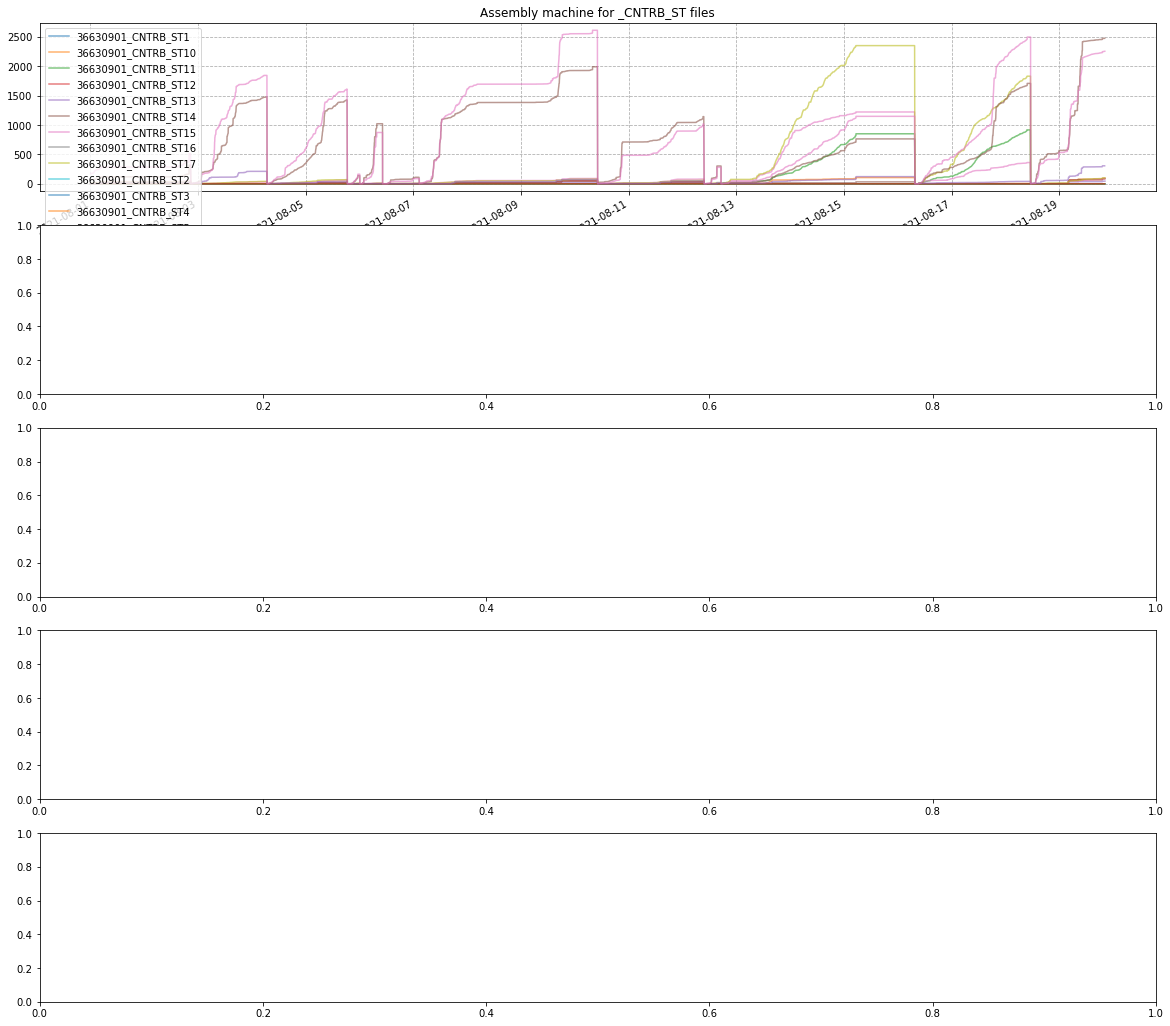

In [9]:
machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

i=0

fig, axs = plt.subplots(len(machines), 1, figsize=(20, 20))

for x in machines:
    name_filter = '_CNTRB_ST'
    names = df_CNTR[(df_CNTR.Name.str.contains(name_filter)) & (df_CNTR.Machine == x)].Name.unique()
    # only get files with a count
    # names = df_CNTR['Name'][df_CNTR.IP_TREND_VALUE > 0].unique()

    for n in names:
        df_CNTR['IP_TREND_VALUE'][df_CNTR.Name == n].plot(label=n, ax=axs[i], alpha=0.6)
        # plt.yscale('log')
        axs[i].grid(True,which="both", linestyle='--')
        axs[i].set_title('{} machine for {} files'.format(x, name_filter))
        axs[i].legend()

    i+=1

In [37]:
df_CNTR[(df_CNTR.Name.str.contains(name_filter)) & (df_CNTR.Machine == x)].Name.unique()

array(['36630901_CNTRB_ST1', '36630901_CNTRB_ST10', '36630901_CNTRB_ST11',
       '36630901_CNTRB_ST12', '36630901_CNTRB_ST13',
       '36630901_CNTRB_ST14', '36630901_CNTRB_ST15',
       '36630901_CNTRB_ST16', '36630901_CNTRB_ST17', '36630901_CNTRB_ST2',
       '36630901_CNTRB_ST3', '36630901_CNTRB_ST4', '36630901_CNTRB_ST5',
       '36630901_CNTRB_ST6', '36630901_CNTRB_ST7', '36630901_CNTRB_ST8',
       '36630901_CNTRB_ST9'], dtype=object)

In [12]:
machines = ('Assembly')
len(machines)

8

In [14]:
df_CNTR[(df_CNTR.Name.str.contains(name_filter)) & (df_CNTR.Machine == x)].Name.unique()

array(['36630901_CNTRB_ST1', '36630901_CNTRB_ST10', '36630901_CNTRB_ST11',
       '36630901_CNTRB_ST12', '36630901_CNTRB_ST13',
       '36630901_CNTRB_ST14', '36630901_CNTRB_ST15',
       '36630901_CNTRB_ST16', '36630901_CNTRB_ST17', '36630901_CNTRB_ST2',
       '36630901_CNTRB_ST3', '36630901_CNTRB_ST4', '36630901_CNTRB_ST5',
       '36630901_CNTRB_ST6', '36630901_CNTRB_ST7', '36630901_CNTRB_ST8',
       '36630901_CNTRB_ST9'], dtype=object)

In [16]:
df_CNTR['IP_TREND_VALUE'][(df_CNTR.Name == n) & (df_CNTR.IP_TREND_VALUE > 0)]

Series([], Name: IP_TREND_VALUE, dtype: int64)

In [26]:
df_CNTR['Name'][df_CNTR.IP_TREND_VALUE > 0].unique()

array(['36630901_CNTRB', '36630901_CNTRB_PCS', '36630901_CNTRB_PRO',
       '36630901_CNTRB_ST10', '36630901_CNTRB_ST11',
       '36630901_CNTRB_ST12', '36630901_CNTRB_ST13',
       '36630901_CNTRB_ST14', '36630901_CNTRB_ST15',
       '36630901_CNTRB_ST17', '36630901_CNTRB_ST7', '36630901_CNTRB_ST8',
       '36630901_CNTRB_ST9', '36630901_CNTRB_ZA_PCS',
       '36630901_CNTRB_ZA_PCS6', '36630901_CNTRB_ZA_PCS7',
       '36630901_CNTRB_ZA_REL', '36630901_CNTR_ADD', '36630901_CNTR_GOOD',
       '36630901_CNTR_GOOD_PCS', '36630901_CNTR_GOOD_ZA',
       '36640901_CNTRB', '36640901_CNTRB_ARK1', '36640901_CNTRB_CODE',
       '36640901_CNTRB_DRKO', '36640901_CNTRB_ETANW',
       '36640901_CNTRB_ETANW_IN', '36640901_CNTRB_ETHO',
       '36640901_CNTRB_ETHO_IN', '36640901_CNTRB_ETSITZ',
       '36640901_CNTRB_FARBK', '36640901_CNTRB_GUTBAND',
       '36640901_CNTRB_PENAN', '36640901_CNTRB_SBAND', '36640901_CNTRG',
       '36640901_CNTR_IN', '36650901_CNTRG_FS_B4W',
       '36650901_CNTRG_PEN_B4W